## Test of the feature extraction (KMer) implementation

### Test for the nucleotidic composition implementation

In [3]:
from src.si.feature_extraction.k_mer import KMer
from src.si.IO.csv_file import read_csv
from src.si.model_selection.split import train_test_split
from sklearn.preprocessing import StandardScaler
from src.si.linear_model.logistic_regression import LogisticRegression
import pandas as pd

/home/rui/Desktop/SIB/si


Usa o dataset tfbs.csv. Inspeciona o conteúdo do dataset.

In [9]:
tfbs_dataset = read_csv(r"/home/rui/Desktop/SIB/si/assignments/aula8/tfbs.csv", features=True, label=True)
tfbs_dataset.get_shape()

/home/rui/Desktop/SIB/si/src/si/IO/csv_file.py:28: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  data = pd.read_csv(filename, sep)


(2000, 1)

Usa o KMer para obter a frequência de cada substring em cada sequência do dataset. Tamanho da substring (k): 3

In [10]:
kmer = KMer(3, alphabet="DNA")

In [11]:
kmer_dataset = kmer.fit_transform(tfbs_dataset)

Usa o sklearn.preprocessing.StandardScaler para standardizar o dataset da composição nucleotídica. 

dataset.X = StandardScaler().fit_transform(dataset.X)

In [12]:
kmer_dataset.X = StandardScaler().fit_transform(kmer_dataset.X)

Divide o dataset em treino e teste.

In [13]:
train, test = train_test_split(kmer_dataset)

Treina o modelo LogisticRegression no dataset de composição nucleotídica.

In [14]:
lg_model = LogisticRegression(max_iter=2000)
lg_model.fit(train)

Qual o score obtido?

In [15]:
lg_model.score(test)

0.96

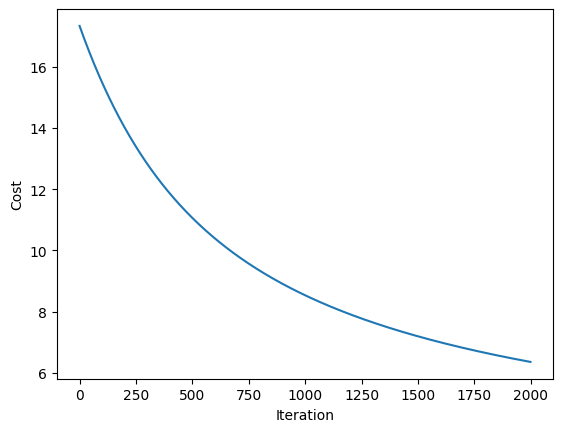

In [19]:
lg_model.plot_cost_history()

### Test for the peptidic composition implementation

In [20]:
transporters = read_csv(r"/home/rui/Desktop/SIB/si/assignments/aula8/transporters.csv", features=True, label=True)
transporters.print_dataframe()

/home/rui/Desktop/SIB/si/src/si/IO/csv_file.py:28: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  data = pd.read_csv(filename, sep)


,Sequence
label,
1,MRIGVYVCHCGLNIAGVIDVSALEEMAGELEDVVLAREVQFLCSDS...
0,MKKTLIALSVSAAAMATGVNAAELYNQDGTSLEMGGRAEARLSMKD...
1,MRIGVYVCHCGLNIAGVIDVSALEEMAGELEDVVLAREVQFLCSDS...
0,MKKTLIALSVSAAAMATGVNAAELYNQDGTSLEMGGRAEARLSMKD...
0,MKKTLIALSVSAAAMATGVNAAELYNQDGTSLEMGGRAEARLSMKD...
...,...
0,MKKTLIALSVSAAAMATGVNAAELYNQDGTSLEMGGRAEARLSMKD...
1,MRIGVYVCHCGLNIAGVIDVSALEEMAGELEDVVLAREVQFLCSDS...
1,MRIGVYVCHCGLNIAGVIDVSALEEMAGELEDVVLAREVQFLCSDS...


In [21]:
kmer_peptidic = KMer(k=2, alphabet="PROT")
kmer_pep_dataset = kmer_peptidic.fit_transform(transporters) 

In [22]:
kmer_pep_dataset.print_dataframe()

,FF,FL,FI,FM,FV,FS,FP,FT,FA,FY,...,GH,GQ,GN,GK,GD,GE,GC,GW,GR,GG
label,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.002967,0.000000,0.000000,0.000000,0.000000,0.000000,0.014837,0.008902,0.000000,...,0.000000,0.008902,0.005935,0.005935,0.014837,0.008902,0.000000,0.000000,0.002967,0.011869
0,0.001261,0.005044,0.002522,0.000000,0.005044,0.001261,0.002522,0.000000,0.001261,0.000000,...,0.000000,0.002522,0.002522,0.007566,0.001261,0.006305,0.007566,0.000000,0.003783,0.006305
1,0.011494,0.011494,0.016092,0.002299,0.006897,0.009195,0.000000,0.002299,0.011494,0.002299,...,0.000000,0.000000,0.004598,0.000000,0.002299,0.002299,0.000000,0.000000,0.006897,0.004598
0,0.000000,0.004057,0.000000,0.000000,0.002028,0.002028,0.004057,0.002028,0.008114,0.006085,...,0.000000,0.002028,0.002028,0.002028,0.006085,0.002028,0.002028,0.004057,0.002028,0.012170
0,0.005822,0.007278,0.004367,0.002911,0.004367,0.011645,0.001456,0.001456,0.004367,0.001456,...,0.002911,0.001456,0.000000,0.001456,0.002911,0.004367,0.004367,0.000000,0.005822,0.007278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.000000,0.003509,0.000000,0.003509,0.003509,0.000000,0.000000,0.000000,0.003509,0.007018,...,0.000000,0.000000,0.000000,0.000000,0.003509,0.007018,0.000000,0.000000,0.000000,0.010526
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.009901,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.009901,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.001770,0.005310,0.000000,0.000000,0.003540,0.000000,0.000000,0.000000,0.001770,0.000000,...,0.001770,0.001770,0.001770,0.001770,0.001770,0.005310,0.003540,0.000000,0.003540,0.005310


In [23]:
kmer_pep_dataset.X = StandardScaler().fit_transform(kmer_pep_dataset.X)

In [24]:
kmer_pep_dataset.print_dataframe()

,FF,FL,FI,FM,FV,FS,FP,FT,FA,FY,...,GH,GQ,GN,GK,GD,GE,GC,GW,GR,GG
label,,,,,,,,,,,,,,,,,,,,,
1,-0.643210,-0.349666,-0.808430,-0.544882,-0.816934,-0.874216,-0.675734,3.952650,1.258081,-0.611113,...,-0.574743,1.887609,1.009287,0.344749,3.128303,1.183601,-0.446780,-0.494333,-0.138156,1.064238
0,-0.297268,0.054710,-0.169362,-0.544882,0.419996,-0.544020,0.311455,-0.817490,-0.568828,-0.611113,...,-0.574743,-0.000812,-0.018790,0.668004,-0.522448,0.576794,2.965142,-0.494333,0.059886,0.137930
1,2.510037,1.310634,3.269119,0.655859,0.874248,1.533553,-0.675734,-0.078393,1.877849,0.360986,...,-0.574743,-0.747320,0.606504,-0.831126,-0.243361,-0.359344,-0.446780,-0.494333,0.815756,-0.146320
0,-0.643210,-0.137538,-0.808430,-0.544882,-0.319528,-0.343090,0.912178,-0.165345,1.069561,1.962091,...,-0.574743,-0.146934,-0.167510,-0.429230,0.774850,-0.422540,0.467910,1.440683,-0.366113,1.114338
0,0.954068,0.489677,0.298079,0.975707,0.253902,2.174923,-0.105981,-0.349503,0.173737,0.004409,...,0.576563,-0.316475,-0.778574,-0.542720,-0.078688,0.123867,1.522400,-0.494333,0.554982,0.299885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,-0.643210,-0.244246,-0.808430,1.287828,0.043492,-0.874216,-0.675734,-0.817490,-0.031413,2.356348,...,-0.574743,-0.747320,-0.778574,-0.831126,0.082007,0.743251,-0.446780,-0.494333,-0.858559,0.840643
1,-0.643210,-0.927451,-0.808430,-0.544882,-0.816934,1.718307,-0.675734,-0.817490,-0.870331,-0.611113,...,-0.574743,2.183278,-0.778574,-0.831126,-0.861561,-0.896506,-0.446780,-0.494333,-0.858559,-0.911720
1,-0.157666,0.106426,-0.808430,-0.544882,0.051106,-0.874216,-0.675734,-0.817490,-0.447160,-0.611113,...,0.125210,-0.223443,-0.245380,-0.480445,-0.385602,0.344195,1.149476,-0.494333,0.000824,-0.027785


In [25]:
train, test = train_test_split(kmer_pep_dataset)

In [26]:
lg_model = LogisticRegression(max_iter=2000)
lg_model.fit(train)

In [27]:
lg_model.score(test)

0.7686567164179104

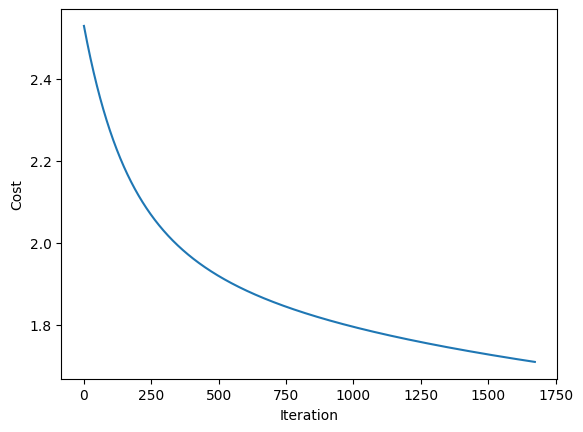

In [28]:
lg_model.plot_cost_history()